In [85]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [86]:
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/home/anurag/ML/Python-Machine-Learning-Projects-Data-Science-Projects/IMDB Score Predictor/movie_metadata.csv' , error_bad_lines=False)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [87]:
df.shape

(5043, 28)

In [88]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [90]:
df.isnull().sum().sort_values(ascending = False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
genres                         0
movie_title                    0
num_voted_users                0
movie_imdb_link                0
imdb_score                     0
cast_total_facebook_likes      0
dtype: int64

In [92]:
df.dropna(how = 'any',axis = 0,inplace = True)

In [93]:
df.isnull().sum().sort_values(ascending = False)

movie_facebook_likes         0
aspect_ratio                 0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
color                        0
dtype: int64

In [94]:
df.shape

(3756, 28)

In [95]:
numerical_features = df.select_dtypes(exclude=['object']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [96]:
num_data = df[numerical_features]
cat_data = df[categorical_features]

In [97]:
num_data.shape,cat_data.shape

((3756, 16), (3756, 12))

In [98]:
num_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [99]:
num_data.drop(['title_year'],axis = 1, inplace = True)

In [100]:
numerical_features = numerical_features.drop('title_year')

In [101]:
numerical_features.size

15

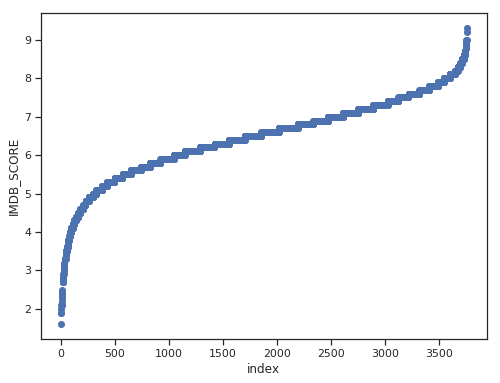

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(range(num_data.shape[0]), np.sort(num_data.imdb_score.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('IMDB_SCORE', fontsize=12)
plt.show()

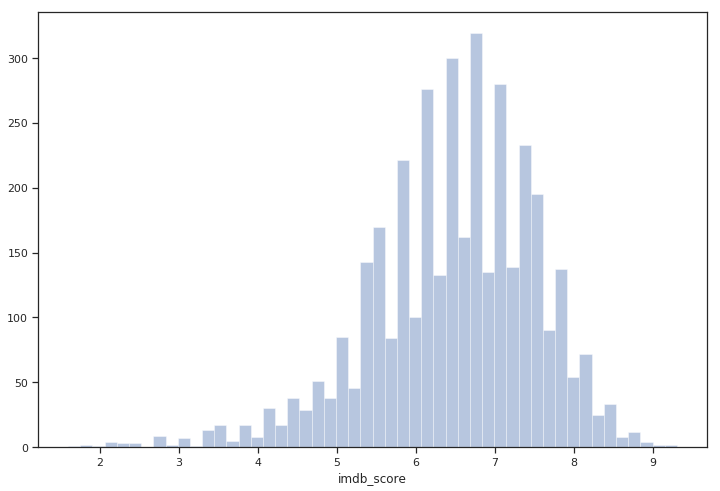

In [103]:
plt.figure(figsize=(12,8))
sns.distplot(num_data.imdb_score.values, bins=50, kde=False)
plt.xlabel('imdb_score', fontsize=12)
plt.show()

In [104]:
np.floor((num_data.shape[1]/3))

5.0

In [105]:
def scatter_with_IMDB(num_data):
    sns.set(style="ticks")
    
    fig, ax = plt.subplots(figsize=(20,20), ncols=3, nrows= (num_data.shape[1]/3 + 1))
    col = 0
    row = 0
    for feat in num_data.columns.tolist():
        ax[row,col].set(ylabel='IMDB Score', xlabel=feat)
        ax[row,col].scatter(x=num_data[feat], y=num_data['imdb_score'], color="b")
        col = col + 1
        if (col == 3):
            col = 0
            row = row + 1
        

In [106]:
#scatter_with_IMDB(num_data)

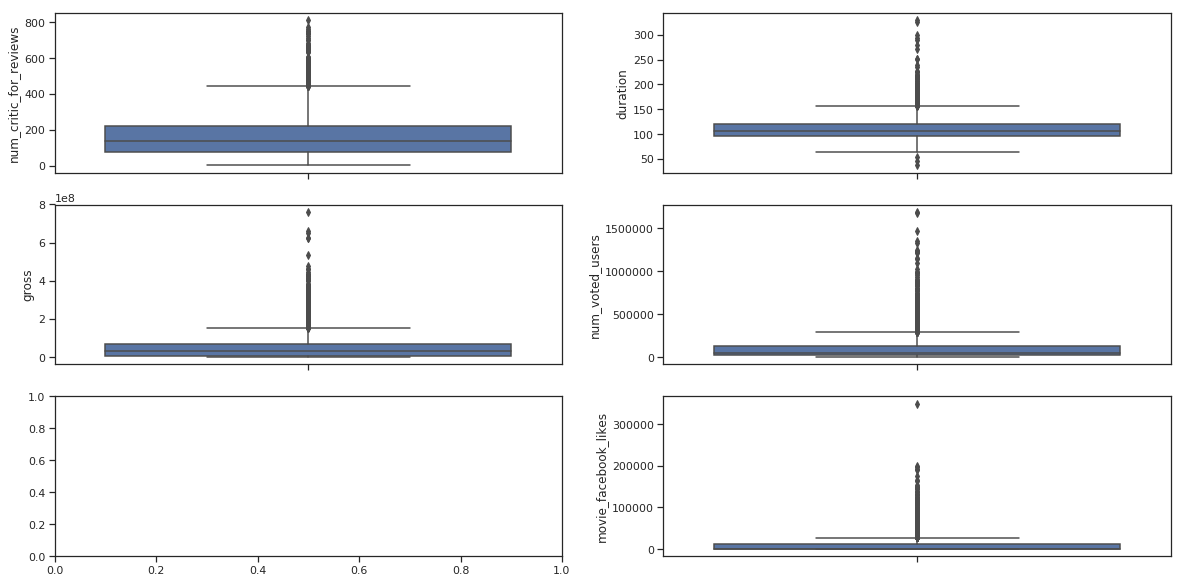

In [107]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2, nrows=3)
sns.set_style("whitegrid")
#sns.boxplot(x="imdb_score", data=num_data,orient = 'v',ax = ax[0][0])
sns.boxplot(x="num_critic_for_reviews", data=num_data,orient = 'v',ax = ax[0][0])
sns.boxplot(x="duration", data=num_data,orient = 'v',ax = ax[0][1])
#sns.boxplot(x="director_facebook_likes", data=num_data,orient = 'v',ax = ax[1][0])
sns.boxplot(x="gross", data=num_data,orient = 'v',ax = ax[1][0])
sns.boxplot(x="num_voted_users", data=num_data,orient = 'v',ax = ax[1][1])
#sns.boxplot(x="num_user_for_reviews", data=num_data,orient = 'v',ax = ax[2][0])
#sns.boxplot(x="title_year", data=num_data,orient = 'v',ax = ax[2][1])
sns.boxplot(x="movie_facebook_likes", data=num_data,orient = 'v',ax = ax[2][1])


# Outliers

In [108]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [109]:
test = outliers_iqr(num_data['imdb_score'])

In [110]:
test = list(test)

In [111]:
num_data.drop(num_data.index[test],inplace = True)
cat_data.drop(cat_data.index[test],inplace = True)

In [112]:
a = num_data[(num_data.num_voted_users < 10000)].index

In [113]:
num_data.drop(a,inplace = True)
cat_data.drop(a,inplace = True)

In [114]:
num_data.shape

(3167, 15)

In [115]:
#scatter_with_IMDB(num_data)

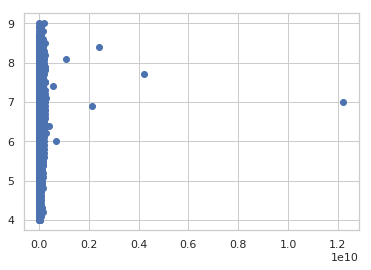

In [117]:
plt.scatter(  num_data['budget'] , num_data['imdb_score']  )

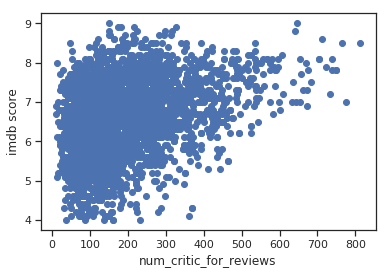

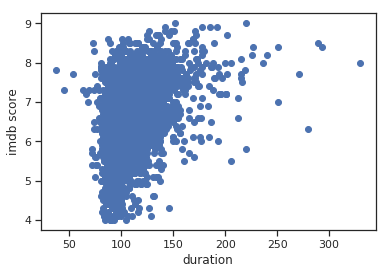

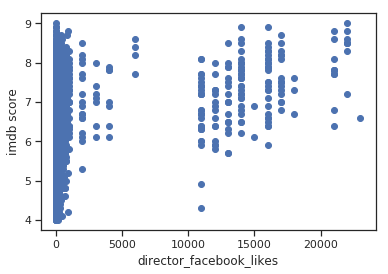

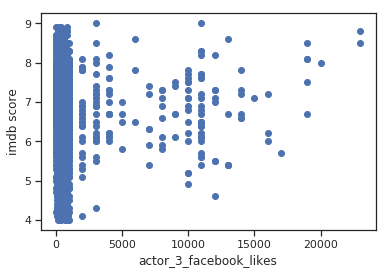

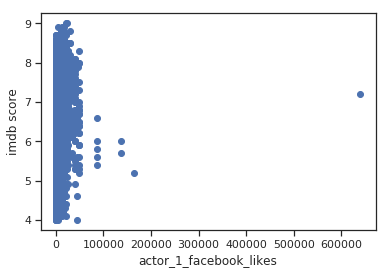

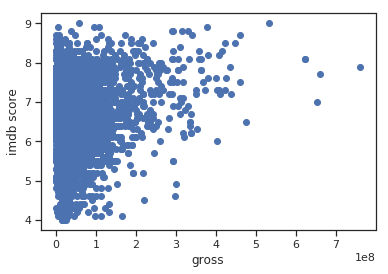

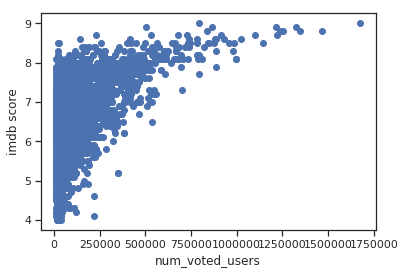

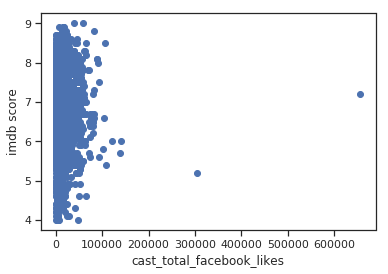

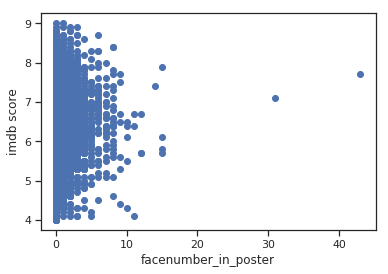

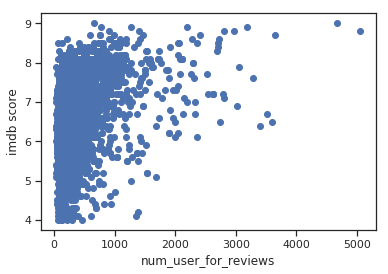

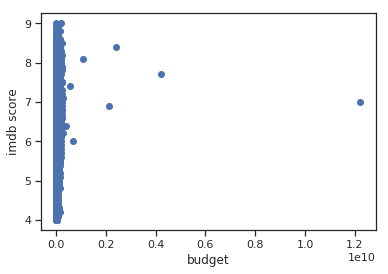

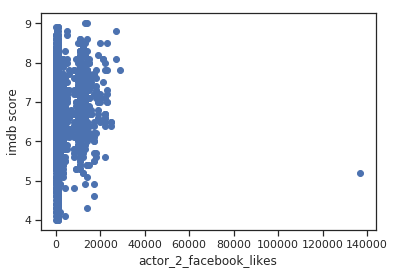

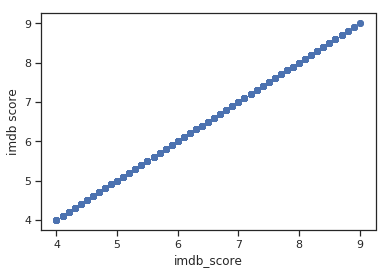

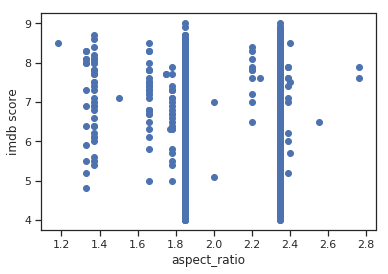

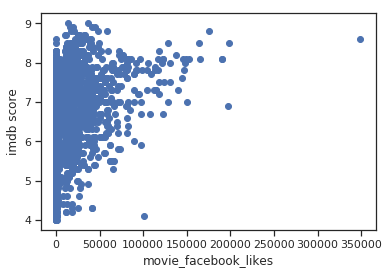

In [55]:
for i in range(0, len(numerical_features)):
    z = numerical_features[i]
    x = num_data[z]
    y = num_data['imdb_score']
    plt.xlabel(z)
    plt.ylabel('imdb score')
    plt.scatter(x,y)
    plt.show()

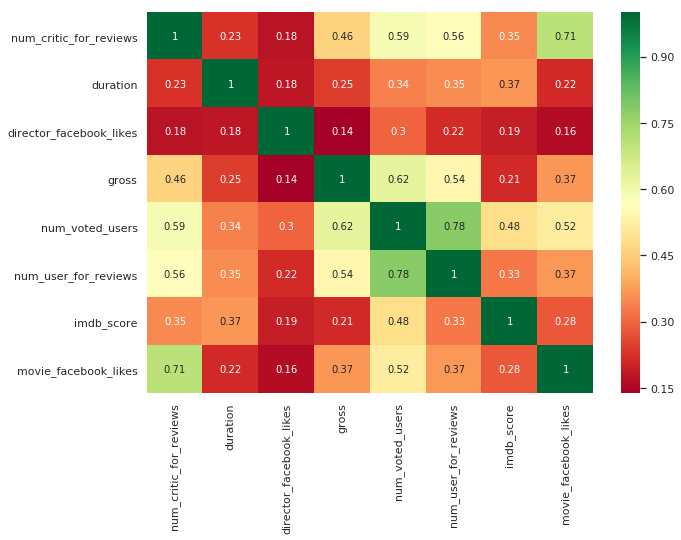

In [118]:
# most correlated features
import seaborn as sns
corrmat = num_data.corr()
plt.figure(figsize = (10,7))
# or fig, ax = plt.subplots(figsize=(20, 10))
top_corr_features = corrmat.index[abs(corrmat["imdb_score"])>0.1]
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [119]:
corrmat.sort_values(["imdb_score"], ascending = False, inplace = True)
print(corrmat.imdb_score)

imdb_score                   1.000000
num_voted_users              0.514526
duration                     0.371942
num_user_for_reviews         0.333493
num_critic_for_reviews       0.309514
movie_facebook_likes         0.285769
director_facebook_likes      0.203727
gross                        0.185152
cast_total_facebook_likes    0.079889
actor_2_facebook_likes       0.079078
actor_1_facebook_likes       0.069796
actor_3_facebook_likes       0.049147
budget                       0.018063
aspect_ratio                -0.019651
facenumber_in_poster        -0.050432
Name: imdb_score, dtype: float64


In [120]:
corrmat.index[abs(corrmat['imdb_score']) > 0.3].tolist()

['imdb_score',
 'num_voted_users',
 'duration',
 'num_user_for_reviews',
 'num_critic_for_reviews']

In [121]:
num_data.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [122]:
num_data.drop([
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'budget',
 'actor_2_facebook_likes',
 'aspect_ratio'],inplace = True,axis = 1)

In [123]:
num_data.isnull().sum().sort_values(ascending = False)

movie_facebook_likes       0
imdb_score                 0
num_user_for_reviews       0
num_voted_users            0
gross                      0
director_facebook_likes    0
duration                   0
num_critic_for_reviews     0
dtype: int64

In [124]:
num_data.median()

num_critic_for_reviews          159.0
duration                        107.0
director_facebook_likes          79.0
gross                      36874745.0
num_voted_users               68935.0
num_user_for_reviews            248.0
imdb_score                        6.7
movie_facebook_likes              0.0
dtype: float64

# Imputing NaN with Median (Because data has outliers)¶


In [125]:
num_data.fillna(num_data.median(),inplace = True)

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,760505847.0,886204,3054.0,7.9,33000
1,302.0,169.0,563.0,309404152.0,471220,1238.0,7.1,0
2,602.0,148.0,0.0,200074175.0,275868,994.0,6.8,85000
3,813.0,164.0,22000.0,448130642.0,1144337,2701.0,8.5,164000
5,462.0,132.0,475.0,73058679.0,212204,738.0,6.6,24000
6,392.0,156.0,0.0,336530303.0,383056,1902.0,6.2,0
7,324.0,100.0,15.0,200807262.0,294810,387.0,7.8,29000
8,635.0,141.0,0.0,458991599.0,462669,1117.0,7.5,118000
9,375.0,153.0,282.0,301956980.0,321795,973.0,7.5,10000
10,673.0,183.0,0.0,330249062.0,371639,3018.0,6.9,197000


# Categorical Variable Genre

In [126]:
cat_data.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
5,Color,Andrew Stanton,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,English,USA,PG-13


In [127]:
df_genres = pd.DataFrame(cat_data['genres'])
df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns = ["Genre_"+str(i) for i in  range(0,8)] )

df_genres = df_genres.reindex(cat_data.index)


cat_data.drop('genres',inplace = True, axis = 1)
cat_data = cat_data.merge(df_genres,left_index = True,right_index = True)

In [130]:
cat_data.shape
#df_genres.head()

(3167, 19)

Plot Keywords Handling

In [131]:
df_plot_keywords = pd.DataFrame(cat_data['plot_keywords'])
df_plot_keywords = pd.DataFrame(df_plot_keywords.plot_keywords.str.split('|').tolist(),columns = ["plot_keywords_"+str(i) for i in  range(0,5)] )
cat_data.drop('plot_keywords',inplace = True, axis = 1)
df_plot_keywords = df_plot_keywords.reindex(cat_data.index)
cat_data = cat_data.merge(df_plot_keywords,left_index = True,right_index = True)

In [132]:
cat_data.head(2)

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,movie_imdb_link,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None,avatar,future,marine,native,paraplegic
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None,None,None,goddess,marriage ceremony,marriage proposal,pirate,singapore


In [133]:
cat_data.shape

(3167, 23)

Filling NaN values in Categorical Features with Mode

In [134]:
cat_data.nunique().sort_values()


color                 2
Genre_7               3
Genre_6               9
Genre_5              11
content_rating       12
Genre_4              16
Genre_0              16
Genre_3              17
Genre_2              20
Genre_1              21
language             29
country              41
actor_1_name       1174
plot_keywords_0    1257
director_name      1294
plot_keywords_4    1422
plot_keywords_1    1493
plot_keywords_3    1515
plot_keywords_2    1576
actor_2_name       1834
actor_3_name       2220
movie_title        3069
movie_imdb_link    3070
dtype: int64

In [135]:
cat_data.columns

Index(['color', 'director_name', 'actor_2_name', 'actor_1_name', 'movie_title',
       'actor_3_name', 'movie_imdb_link', 'language', 'country',
       'content_rating', 'Genre_0', 'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4',
       'Genre_5', 'Genre_6', 'Genre_7', 'plot_keywords_0', 'plot_keywords_1',
       'plot_keywords_2', 'plot_keywords_3', 'plot_keywords_4'],
      dtype='object')

In [136]:
cat_data.drop(['movie_imdb_link','Genre_6','Genre_7'],inplace = True, axis = 1)

# Split Data before doing any transformations

In [137]:
whole_data = pd.concat([num_data,cat_data],axis = 1)

In [138]:
whole_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,imdb_score,movie_facebook_likes,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
0,723.0,178.0,0.0,760505847.0,886204,3054.0,7.9,33000,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None,avatar,future,marine,native,paraplegic
1,302.0,169.0,563.0,309404152.0,471220,1238.0,7.1,0,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None,goddess,marriage ceremony,marriage proposal,pirate,singapore
2,602.0,148.0,0.0,200074175.0,275868,994.0,6.8,85000,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,English,UK,PG-13,Action,Adventure,Thriller,None,None,None,bomb,espionage,sequel,spy,terrorist
3,813.0,164.0,22000.0,448130642.0,1144337,2701.0,8.5,164000,Color,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,English,USA,PG-13,Action,Thriller,None,None,None,None,deception,imprisonment,lawlessness,police officer,terrorist plot
5,462.0,132.0,475.0,73058679.0,212204,738.0,6.6,24000,Color,Andrew Stanton,Samantha Morton,Daryl Sabara,John Carter,Polly Walker,English,USA,PG-13,Action,Adventure,Romance,None,None,None,sandman,spider man,symbiote,venom,villain


In [139]:
whole_data.shape

(3167, 28)

In [140]:
y = whole_data['imdb_score']

In [141]:
whole_data.drop('imdb_score',axis = 1,inplace = True)

In [142]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(whole_data,y, random_state = 0,test_size = 0.20) # test_size = 0.10

In [143]:
num_feat = whole_data.select_dtypes(exclude=['object']).columns.tolist()
cat_feat = whole_data.select_dtypes(include=['object']).columns.tolist()

In [144]:
X_train_num = X_train[num_feat]

X_train_cat = X_train[cat_feat]

In [145]:
X_test_num = X_test[num_feat]

X_test_cat = X_test[cat_feat]

# Skewness

In [146]:
from scipy.stats import skew 
skewness = X_train_num.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.75]
skew_features = X_train_num[skewness.index]
skew_features  = np.log1p(skew_features)
X_train_num[skewness.index] = skew_features

In [147]:
X_train_num.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,movie_facebook_likes
2803,5.529429,4.927254,4.969813,15.512927,11.438008,5.771441,8.517393
371,5.293305,4.736198,5.402677,18.420869,11.959846,5.942799,0.000000
1080,3.688879,4.787492,6.295266,18.338551,10.732018,4.553877,6.908755
2493,5.648974,4.394449,6.416732,11.349959,11.914483,6.735780,0.000000
1217,4.836282,5.332719,0.000000,18.069782,11.639320,6.093570,0.000000


# Standardize

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)

In [149]:
for i, col in enumerate(num_feat):
    X_train_num.loc[:,col] = X_train_num_scaled[:, i]

# Transformations on Numeric Test data

In [150]:
from scipy.stats import skew 
skewness = X_test_num.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.75]
skew_features = X_test_num[skewness.index]
skew_features  = np.log1p(skew_features)
X_test_num[skewness.index] = skew_features

In [151]:
X_test_num_scaled = scaler.transform(X_test_num)

In [152]:
for i, col in enumerate(num_feat):
    X_test_num.loc[:,col] = X_test_num_scaled[:, i]